## 第二章 监督学习

### 2.1 分类与回归
> 监督学习有两类，我们熟知的是：分类(classification)与回归(regression0)
* 分类问题：
    * target：分类问题的核心就是预测标签名(class label)，这也就是我们再Section1里面的花卉分
    类一样，我们需要对测试对象分类得出结果。
    * 分类划分：
        * 二分类:测试对象的标签只有两个，也就是说可以使用0或者1来表示所有标签。
            * 一个类叫做正类(positive class)；
            * 一个叫做反类(negative class)：
        * 多分类：测试对象的标签不只有2个，可能有很多个,可以说是二分类的拓展。
* 回归问题：
    * target:回归问题的核心就是得到一个足以预测一个连续值的算法，编程术语叫做，浮点数(floating-point number)
    也就是数学上的实数。

### 2.2 泛化，过拟合与欠拟合
* 泛化(generalize)：
    * 我们机器学习的实质就是让机器能够从训练的数据里面走出来，进入测试数据进行预测，泛化就是指的是从训练集到
    测试集的过程，我们称之为泛化，我们所希望的是得到一个泛化程度尽可能高的一个模型。
* 过拟合(overfitting)：
    * 构建的模型在你自己的数据集上非常精确，但是当走出自己的数据集时就出现巨大漏洞，这就是过拟合
* 欠拟合(underfitting)：
    * 根本抓不住重点的拟合，就连自己的数据集都拟合不了，模型建立非常拉跨。
#### 模型复杂度与数据集大小之间的关系
> 相信自己模块的实力就喂给它足够可怕的数据量，它不会让你失望的。

### 2.3 监督学习算法
#### 2.3.1 一些样本数据集
> 导入一下包文件用于测试

In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
import mglearn

c:\users\hp2\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


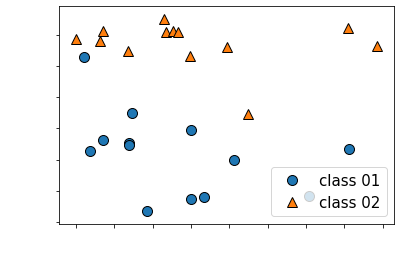

In [2]:
x,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(['class 01','class 02'],fontsize=15,loc=4)
plt.xlabel("First Feature",c='white',fontsize=20)
plt.xticks(c='white',fontsize=15)
plt.yticks(c='white',fontsize=15)
plt.ylabel("Second Feature",c='white',fontsize=20)
plt.show()

#### 简单使用sklearn实现线性回归

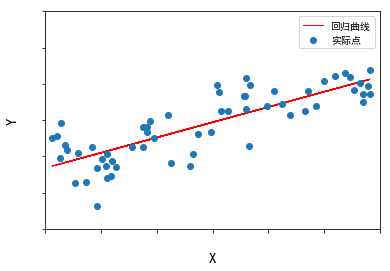

In [3]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x1,y1 = mglearn.datasets.make_wave(n_samples=60)
model.fit(x1,y1)
predicts = model.predict(x1)
plt.plot(x1,predicts,color='r',linewidth=1,label='回归曲线')
plt.plot(x1,y1,'o',label='实际点')
plt.legend(fontsize=10,loc='upper right')
plt.xticks(c='white',fontsize=15)
plt.yticks(c='white',fontsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.show()

#### 癌症的分布分析(分类问题(Class))

In [4]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print("Breast cancer's keys are \n\t{}".format(breast_cancer.keys()))

Breast cancer's keys are 
	dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("Breast cancer's target_names is \n\t{}".format(breast_cancer['target_names']))

Breast cancer's target_names is 
	['malignant' 'benign']


In [6]:
print("Breast cancer's data is \n\t{}".format(breast_cancer['data']))

Breast cancer's data is 
	[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
print("Breast cancer's class is \n\t{}".format({n:k for n,k in zip(breast_cancer['target_names'],np.bincount(breast_cancer['target']))}))

Breast cancer's class is 
	{'malignant': 212, 'benign': 357}


In [8]:
print("Breast cancer's feature_names are \n\t{}".format(breast_cancer['feature_names']))

Breast cancer's feature_names are 
	['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
print("Breast cancer's DESCR \n\t{}".format(breast_cancer['DESCR']))

Breast cancer's DESCR 
	.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

#### Boston的房价预测

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
boston_model = LinearRegression()
boston_model.fit(boston.data,boston.target)
predicts2 = boston_model.predict(boston.data)
tamp = np.subtract(boston.target,predicts2)
result_boston:float = np.sum(tamp)
print("拟合程度(位差) is \n\t{}\n".format(result_boston/len(boston.target)))
print("就这拟合程度就离谱？？？？？")

拟合程度(位差) is 
	7.358189595618429e-15

就这拟合程度就离谱？？？？？


##### 房价预测总结：
> 我们再使用线性回归求解时候要确保x与y的行数相等，不然无法拟合，使用predict函数进行测试对象的预测，妙啊。
>注意LinearRegression()是一个类(class)其中的函数也是很多的，常用的是fit导入数据，predict函数预测数据，用的都是numpy定义的数据类型(array).

#### 2.3.2 K近邻分析

c:\users\hp2\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


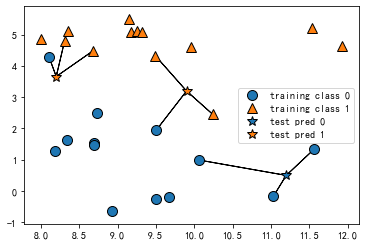

In [12]:
from sklearn.model_selection import train_test_split
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 这里的函数图像其实是一个实现预定好的一个函数图像，方便我们理解K近邻算法的内涵的图像。

In [13]:
from sklearn.neighbors import KNeighborsClassifier
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,random_state=0)
forge_knn = KNeighborsClassifier(n_neighbors=3)
forge_knn.fit(x_train2,y_train2)
forge_pred = forge_knn.predict(x_test2)
print("forge_pred are \n\t{}".format(forge_pred))
print("y_test2 are \n\t{}".format(y_test2))
print("Result is \n\t{}".format(forge_knn.score(x_test2,y_test2)))

forge_pred are 
	[1 0 1 0 1 0 0]
y_test2 are 
	[1 0 1 0 1 1 0]
Result is 
	0.8571428571428571


> 这里的函数我们要记得score函数需要放的是测试的数据集合，而不是我们自己个人得出的数据集合。

##### 可视化一下K邻分析

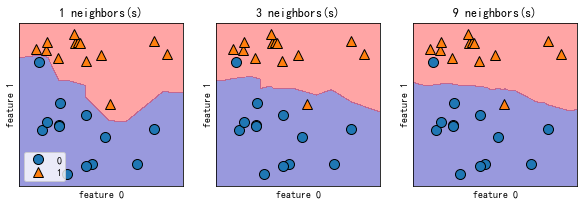

In [14]:
fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

##### 对上面的乳腺癌分析一下：

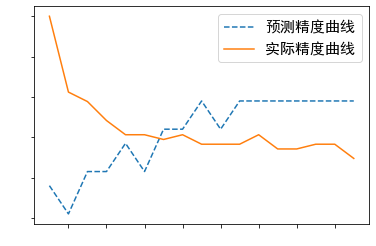

In [15]:
x3_train,x3_test,y3_train,y3_test = train_test_split(breast_cancer['data'],breast_cancer['target'],random_state=0)
pred_accuracy:list = []
test_accuracy:list = []
for n_neighbors in range(1,18):
    breast_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    breast_knn.fit(x3_train,y3_train)
    pred_accuracy.append(breast_knn.score(x3_test,y3_test))
    test_accuracy.append(breast_knn.score(x3_train,y3_train))
plt.plot(range(1,18),pred_accuracy,linestyle='--',label='预测精度曲线')
plt.plot(range(1,18),test_accuracy,label='实际精度曲线')
plt.xticks(c='white')
plt.yticks(c='white')
plt.legend(fontsize=15,loc='upper right')
plt.show()

> 发现一个问题，我们使用Knn算法无法实现绝对的精确，就是无法打到我们自己的预期效果。

##### K近邻回归：

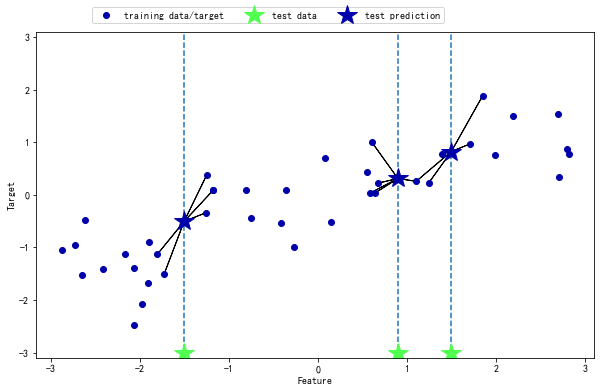

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

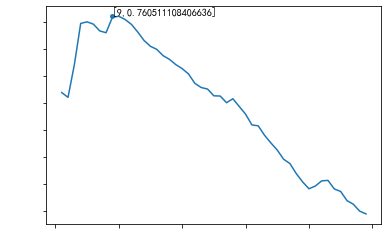

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn_accuracy = []
for n_neighbors in range(1,50):
    wave_Knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    x2,y2 = mglearn.datasets.make_wave(n_samples=100)
    x4_train,x4_test,y4_train,y4_test = train_test_split(x2,y2,random_state=0)
    wave_Knn.fit(x4_train,y4_train)
    knn_accuracy.append(wave_Knn.score(x4_test,y4_test))
y_index = np.argmax(knn_accuracy)
plt.scatter(y_index,knn_accuracy[y_index],s=15)
show_max = "[" + str(y_index) + "," + str(knn_accuracy[y_index]) + "]"
plt.annotate(show_max,xytext=(y_index,knn_accuracy[y_index]),xy=(y_index,knn_accuracy[y_index]))
plt.plot(range(1,50),knn_accuracy,label='测试R方')
plt.xticks(c='white',fontsize=16)
plt.yticks(c='white',fontsize=16)
plt.show()

#### 分析KNeighbourRegression

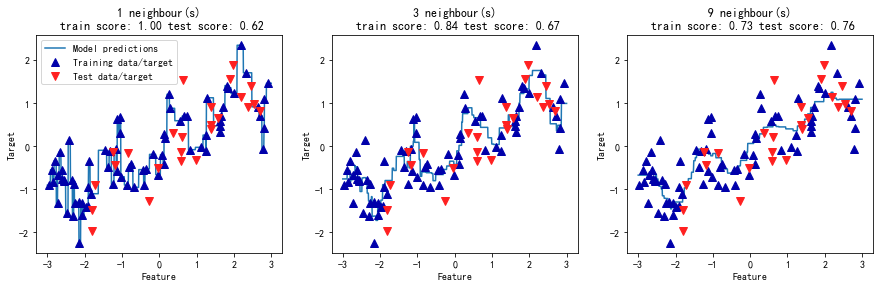

In [18]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors , ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x4_train,y4_train)
    ax.plot(line,reg.predict(line))
    ax.plot(x4_train,y4_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(x4_test,y4_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title(
        "{} neighbour(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors,reg.score(x4_train,y4_train),reg.score(x4_test,y4_test)
        )
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="best")

##### 小总结：
* fig，axes是subplots的返回值，我的subplots函数的参数是有纵行两个以及图像大小所构成，具体来说，也就是说，每一个axes所代表的其实就是每一个视图
* zip具有压缩功能，我们把如上的参数压缩到一起，然后就使用不同的参数名字以对其进行访问，避免了代码敲的重复，复杂，符合我们的python之禅的道理
* reg是我们自己定义的一个个回归类，具有回归的方法。
###### KNeighbourRegression的有缺点
* 优点：
    * 方便理解，在参数较少是拥有较好的拟合效果，
    * 不需要经过调参就能获得很好的拟合效果，就很简单易学，上手也比较快
* 缺点：
    * 如果训练的量很大的话，我们将不能具有很迅速的拟合结果的出炉，
    * 如果参数过多的话，拟合结果也将出人意料的拉跨，就像我上面写的哪一个KNeighbourRegression预测我们的房价变化，最高也只有7点几
    * 同样的对于取值大多为0的数据集，就是所谓的稀疏数据集来说，这种方法确实不行，很拉跨。

#### 2.3.3 线性模型

w[0]: 0.393906  b: -0.031804


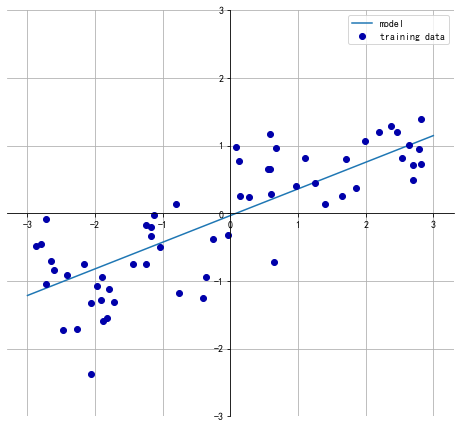

In [19]:
mglearn.plots.plot_linear_regression_wave()

In [21]:
from sklearn.linear_model import  LinearRegression
Lnn = LinearRegression()
x,y = mglearn.datasets.make_wave(n_samples=60)
x5_train,x5_test,y5_train,y5_test = train_test_split(x,y,random_state=0)
Lnn.fit(x5_train,y5_train)
print("Lnn 的斜率是： {}".format(Lnn.coef_))
print("Lnn 的截距式： {}".format(Lnn.intercept_))
print("拟合的结果是： {}".format(Lnn.score(x5_test,y5_test)))

Lnn 的斜率是： [0.44153666]
Lnn 的截距式： -0.01711124414733381
拟合的结果是： 0.6932519118518163


In [22]:
# 对于一维的数据我们的拟合效果说实话不是很好，但是当数据增多维度时候，就可以发现其的实力
# 波士顿的房价安排上

In [61]:
# 线性回归分析波士顿房价
from sklearn.datasets import load_boston
data_boston = load_boston()
x6_train,x6_test,y6_train,y6_test = train_test_split(data_boston['data'],data_boston['target'])
Lnn_boston = LinearRegression()
Lnn_boston.fit(x6_train,y6_train)
print("拟合的结果是:{}\n\t{}".format(Lnn_boston.score(x6_test,y6_test),Lnn_boston.score(x6_train,y6_train)))

拟合的结果是:0.6017618720115725
	0.7751357208651612


In [62]:
# 岭回归分析波士顿房价
from sklearn.linear_model import Ridge
Rig_boston = Ridge().fit(x6_train,y6_train)
print("岭回归的拟合结果是：{}\n\t{}".format(Rig_boston.score(x6_test,y6_test),Rig_boston.score(x6_train,y6_train)))

岭回归的拟合结果是：0.5932413581048909
	0.7734011669767328


> 由此可加我们在希望其拟合效果更好时候我们应当采用我们的岭回归，而不去采用这个线性回归，但是我们要考虑到，线性回归的限制条件没有那么的广，比较方便使用，同时也没有那么复杂。